In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.signal import find_peaks
from ShelvingAnalysis import ShelvingAnalysis
from tqdm.notebook import tqdm

df1 = pd.read_csv('ShelvingIntensityRawDataAmp10.csv')
ShelvingIntensityAverageArray1 = df1['ShelvingIntensityAverageAmp10'].tolist()
ShelvingIntensityUncertaintyArray1 = df1['ShelvingIntensityUncertaintyAmp10'].tolist()
ShelvingIntensityAverageArray_cleaned1 = np.delete(ShelvingIntensityAverageArray1, [11,22,33,44,55,66,77,88])
ShelvingIntensityUncertaintyArray_cleaned1 = np.delete(ShelvingIntensityUncertaintyArray1, [11,22,33,44,55,66,77,88])

df2 = pd.read_csv('ShelvingIntensityRawDataAmp05.csv')
ShelvingIntensityAverageArray2 = df2['ShelvingIntensityAverageAmp05'].tolist()
ShelvingIntensityUncertaintyArray2 = df2['ShelvingIntensityUncertaintyAmp05'].tolist()
ShelvingIntensityAverageArray_cleaned2 = np.delete(ShelvingIntensityAverageArray2, [11,22,33,44,55,66,77,88])
ShelvingIntensityUncertaintyArray_cleaned2 = np.delete(ShelvingIntensityUncertaintyArray2, [11,22,33,44,55,66,77,88])

df3 = pd.read_csv('ShelvingIntensityRawDataAmp025.csv')
ShelvingIntensityAverageArray3 = df3['ShelvingIntensityAverageAmp025'].tolist()
ShelvingIntensityUncertaintyArray3 = df3['ShelvingIntensityUncertaintyAmp025'].tolist()
ShelvingIntensityAverageArray_cleaned3 = np.delete(ShelvingIntensityAverageArray3, [11,22,33,44,55,66])
ShelvingIntensityUncertaintyArray_cleaned3 = np.delete(ShelvingIntensityUncertaintyArray3, [11,22,33,44,55,66])

ShelvingIntensityAverageArray_cleaned3_padded = np.pad(ShelvingIntensityAverageArray_cleaned3, (20,0), mode = 'constant', constant_values = 0)
ShelvingIntensityUncertaintyArray_cleaned3_padded = np.pad(ShelvingIntensityUncertaintyArray_cleaned3, (20,0), mode = 'constant', constant_values = 0)

In [3]:
### ---------------------- INITIALISE PLOTTING STYLE ---------------------- ###

## WINDOWS: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

## MAC: On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
# import matplotlib.pyplot as plt
# import sys
# sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
# from plotting_style import set_plotting_style
# set_plotting_style()


import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')


Initialising plotting style...
Success! Plotting style initialised.
Initialising plotting style...
Success! Plotting style initialised.


Text(0.5, 0, 'Frequency Detuning ($\\times$10$^3$ $\\Gamma_{red}$)')

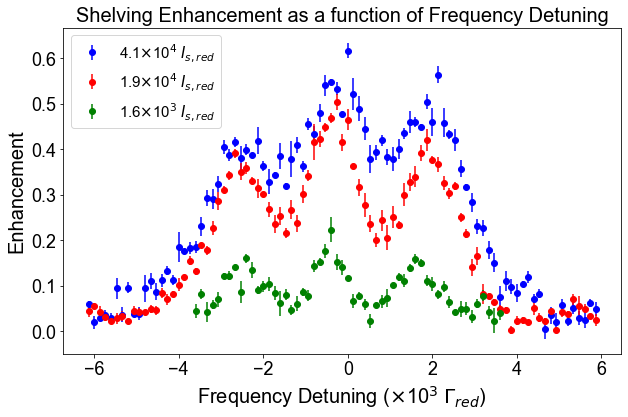

In [4]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuningGamma, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'4.1$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuningGamma, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'1.9$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuningGamma[-72:-17], ShelvingIntensityAverageArray_cleaned3[:-16], yerr=ShelvingIntensityUncertaintyArray_cleaned3[:-16], fmt='o', color='green',label=r'1.6$\times$10$^3$ $I_{s,red}$')
plt.legend(loc='upper left')

plt.title('Shelving Enhancement as a function of Frequency Detuning')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning ($\times$10$^3$ $\Gamma_{red}$)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuning.png', dpi=1200)
# plt.savefig('ShelvingEnhancementVsFrequencyDetuning.pdf',dpi=1200)

In [5]:
PowerAmp10 = 65 #mW
IntensityAmp10 = 2*PowerAmp10/(np.pi*0.58**2) #mW/cm^2
IntensityAmp10SaturationRed = IntensityAmp10*1e3/3

IntensityAmp10SaturationRed

41003.05707876813

In [6]:
PowerAmp05 = 30 #mW
IntensityAmp05 = 2*PowerAmp05/(np.pi*0.58**2) #mW/cm^2
IntensityAmp05SaturationRed = IntensityAmp05*1e3/3

IntensityAmp05SaturationRed

18924.487882508365

In [7]:
PowerAmp025 = 2.5 #mW
IntensityAmp025 = 2*PowerAmp025/(np.pi*0.58**2) #mW/cm^2
IntensityAmp025SaturationRed = IntensityAmp025*1e3/3

IntensityAmp025SaturationRed

1577.040656875697

Text(0.5, 0, 'Frequency Detuning (MHz)')

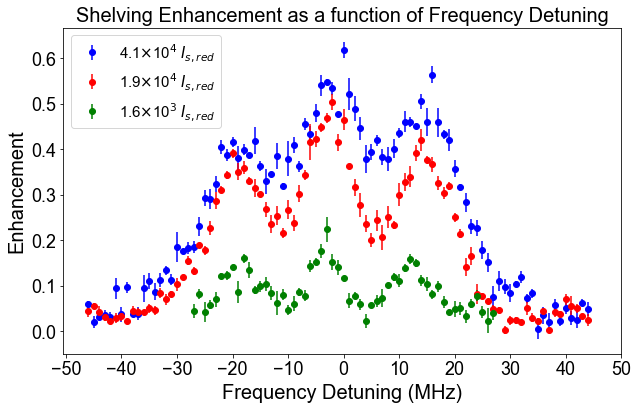

In [8]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'4.1$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'1.9$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuning[-72:-17], ShelvingIntensityAverageArray_cleaned3[:-16], yerr=ShelvingIntensityUncertaintyArray_cleaned3[:-16], fmt='o', color='green',label=r'1.6$\times$10$^3$ $I_{s,red}$')
plt.legend(loc='upper left')

plt.xticks(np.arange(-50, 51, 10))
plt.title('Shelving Enhancement as a function of Frequency Detuning')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning (MHz)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuning2.png', dpi=1200)
# plt.savefig('ShelvingEnhancementVsFrequencyDetuning2.pdf',dpi=1200)

# Fitting

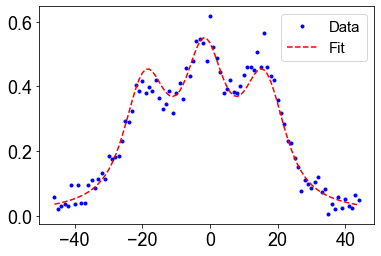

Fitted parameters:  [11.85845523 -1.62608663  0.01796633  8.03057775  7.43218098 17.59594352
  3.00027112  5.37405307]


In [9]:
import numpy as np
from scipy.special import wofz
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Voigt profile
def voigt(x, amp, mu, sigma, gamma):
    z = ((x - mu) + 1j*gamma) / (sigma * np.sqrt(2))
    return amp * np.real(wofz(z)) / (sigma * np.sqrt(2*np.pi))

# Define a combination of three Voigt profiles: one central and two side ones
def combined_voigt(x, amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s):
    # Central Voigt profile
    central = voigt(x, amp_c, mu_c, sigma_c, gamma_c)
    # Side Voigt profiles (symmetrically placed)
    side_left = voigt(x, amp_s, mu_c - delta_s, sigma_s, gamma_s)
    side_right = voigt(x, amp_s, mu_c + delta_s, sigma_s, gamma_s)
    # Combine them
    return central + side_left + side_right

# Generate some synthetic data (for demonstration)
x_data1 = FrequencyDetuning
true_params = [1.0, 0.0, 1.0, 0.5, 0.5, 5.0, 1.5, 0.5]  # Central and side Voigt parameters
y_data = ShelvingIntensityAverageArray_cleaned1

# Initial guesses for fitting parameters: [amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s]
initial_guesses = [15.0, 0.0, 1.0, 0.5, 0.5, 5.0, 1.0, 0.5]

# Fit the combined Voigt profile to the data
popt1, pcov = curve_fit(combined_voigt, x_data1, y_data, p0=initial_guesses)

# Plot the result
plt.plot(x_data1, y_data, 'b.', label='Data')
plt.plot(x_data1, combined_voigt(x_data1, *popt1), 'r--', label='Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters: ", popt1)


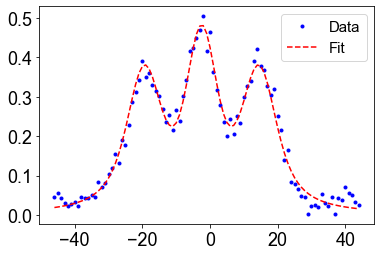

Fitted parameters:  [ 5.69708874 -2.45653059  3.1953637   2.54864388  6.44535577 16.971124
  2.628836    4.74303894]


In [10]:
import numpy as np
from scipy.special import wofz
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Voigt profile
def voigt(x, amp, mu, sigma, gamma):
    z = ((x - mu) + 1j*gamma) / (sigma * np.sqrt(2))
    return amp * np.real(wofz(z)) / (sigma * np.sqrt(2*np.pi))

# Define a combination of three Voigt profiles: one central and two side ones
def combined_voigt(x, amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s):
    # Central Voigt profile
    central = voigt(x, amp_c, mu_c, sigma_c, gamma_c)
    # Side Voigt profiles (symmetrically placed)
    side_left = voigt(x, amp_s, mu_c - delta_s, sigma_s, gamma_s)
    side_right = voigt(x, amp_s, mu_c + delta_s, sigma_s, gamma_s)
    # Combine them
    return central + side_left + side_right

# Generate some synthetic data (for demonstration)
x_data2 = FrequencyDetuning
true_params = [1.0, 0.0, 1.0, 0.5, 0.5, 5.0, 1.5, 0.5]  # Central and side Voigt parameters
y_data = ShelvingIntensityAverageArray_cleaned2

# Initial guesses for fitting parameters: [amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s]
initial_guesses = [1.0, 0.0, 1.0, 0.5, 0.5, 5.0, 1.0, 0.5]

# Fit the combined Voigt profile to the data
popt2, pcov = curve_fit(combined_voigt, x_data2, y_data, p0=initial_guesses)

# Plot the result
plt.plot(x_data2, y_data, 'b.', label='Data')
plt.plot(x_data2, combined_voigt(x_data2, *popt2), 'r--', label='Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters: ", popt2)


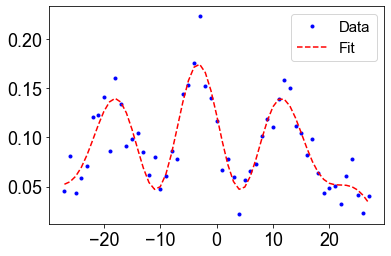

Fitted parameters:  [ 2.24509644e-08 -3.24817329e+00  1.46419763e+01 -8.74490980e+01
  8.95719469e-02  5.83668113e+01 -4.52207609e+01  1.39404671e+02]


In [12]:
import numpy as np
from scipy.special import wofz
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Voigt profile
def voigt(x, amp, mu, sigma, gamma):
    z = ((x - mu) + 1j*gamma) / (sigma * np.sqrt(2))
    return amp * np.real(wofz(z)) / (sigma * np.sqrt(2*np.pi))

# Define a combination of three Voigt profiles: one central and two side ones
def combined_voigt(x, amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s):
    # Central Voigt profile
    central = voigt(x, amp_c, mu_c, sigma_c, gamma_c)
    # Side Voigt profiles (symmetrically placed)
    side_left = voigt(x, amp_s, mu_c - delta_s, sigma_s, gamma_s)
    side_right = voigt(x, amp_s, mu_c + delta_s, sigma_s, gamma_s)
    # Combine them
    return central + side_left + side_right

# Generate some synthetic data (for demonstration)
x_data3 = FrequencyDetuning[-72:-17]
true_params = [1.0, 0.0, 1.0, 0.5, 0.5, 5.0, 1.5, 0.5]  # Central and side Voigt parameters
y_data = ShelvingIntensityAverageArray_cleaned3[:-16]

# Initial guesses for fitting parameters: [amp_c, mu_c, sigma_c, gamma_c, amp_s, delta_s, sigma_s, gamma_s]
initial_guesses = [0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 1.0, 0.1]

# Fit the combined Voigt profile to the data
popt3, pcov = curve_fit(combined_voigt, x_data3, y_data, p0=initial_guesses)

# Plot the result
plt.plot(x_data3, y_data, 'b.', label='Data')
plt.plot(x_data3, combined_voigt(x_data3, *popt3), 'r--', label='Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters: ", popt3)


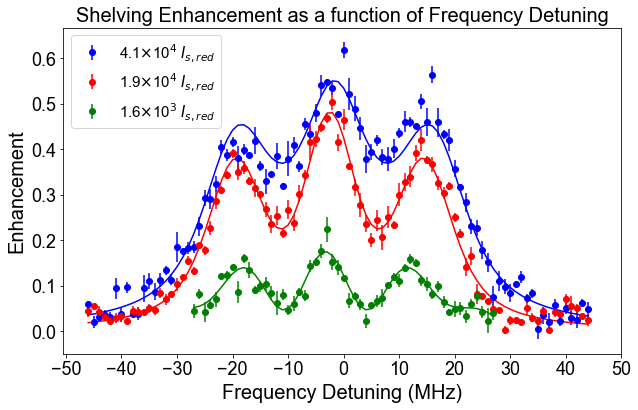

In [14]:
### ---------------------- PLOTTING ---------------------- ###

plt.figure(figsize=(10,6))

# convert x-axis to frequency detuning space in MHz, where the biggest shelving intensity is 0 detuning
FrequencyDetuning = np.arange(-np.argmax(ShelvingIntensityAverageArray_cleaned1), np.shape(ShelvingIntensityAverageArray_cleaned1)[0]-np.argmax(ShelvingIntensityAverageArray_cleaned1))
FrequencyDetuningGamma = FrequencyDetuning/7.5 # convert to units of x 10e3 Gamma_red (7.5kHz)

# plt.errorbar(range(len(ShelvingIntensityAverageArray)), ShelvingIntensityAverageArray, yerr=ShelvingIntensityUncertaintyArray, fmt='o')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned1, yerr=ShelvingIntensityUncertaintyArray_cleaned1, fmt='o',color='blue', label=r'4.1$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuning, ShelvingIntensityAverageArray_cleaned2, yerr=ShelvingIntensityUncertaintyArray_cleaned2, fmt='o', color='red', label=r'1.9$\times$10$^4$ $I_{s,red}$')
plt.errorbar(FrequencyDetuning[-72:-17], ShelvingIntensityAverageArray_cleaned3[:-16], yerr=ShelvingIntensityUncertaintyArray_cleaned3[:-16], fmt='o', color='green',label=r'1.6$\times$10$^3$ $I_{s,red}$')

plt.plot(FrequencyDetuning, combined_voigt(FrequencyDetuning, *popt1), 'b-')
plt.plot(FrequencyDetuning, combined_voigt(FrequencyDetuning, *popt2), 'r-')
plt.plot(FrequencyDetuning[-72:-17], combined_voigt(FrequencyDetuning[-72:-17], *popt3), 'g-')

plt.legend(loc='upper left')

plt.xticks(np.arange(-50, 51, 10))
plt.title('Shelving Enhancement as a function of Frequency Detuning')
plt.ylabel(r'Enhancement')
plt.xlabel(r'Frequency Detuning (MHz)')

# plt.savefig('ShelvingEnhancementVsFrequencyDetuning2Fitted.png', dpi=1200)
plt.savefig('ShelvingEnhancementVsFrequencyDetuning2Fitted.pdf',dpi=1200)